<a href="https://colab.research.google.com/github/vivekp2005/AI-ML-/blob/main/PROJECT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title**

**Customer Behaviour Analaysis & Prediction System**

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from statsmodels.stats.outliers_influence import variance_inflation_factor

**Part A: Data Understanding**

In [ ]:
#Load the dataset
from google.colab import files
uploaded=files.upload()



Saving Wholesale customers dataa.csv.xlsx to Wholesale customers dataa.csv (2).xlsx


In [ ]:
#Display basic information
import pandas as pd
df= pd.read_excel("Wholesale customers dataa.csv.xlsx")
print(df)

     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...

In [ ]:
#Identify features and target
features = df.columns.tolist()
target = "Channel"   # Hotel = 1, Retail = 2

print("Features:", features)
print("Target Variable:", target)

Features: ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
Target Variable: Channel


In [ ]:
#Supervised Vs Unsupervised
print("""
Supervised Learning:
- Channel is known (Hotel/Retail)
- Used for Classification & Regression

Unsupervised Learning:
- No labels used
- Used for customer segmentation via K-Means
""")


Supervised Learning:
- Channel is known (Hotel/Retail)
- Used for Classification & Regression

Unsupervised Learning:
- No labels used
- Used for customer segmentation via K-Means



**Parrt B: Data Preprocessing & Feature Engineering**

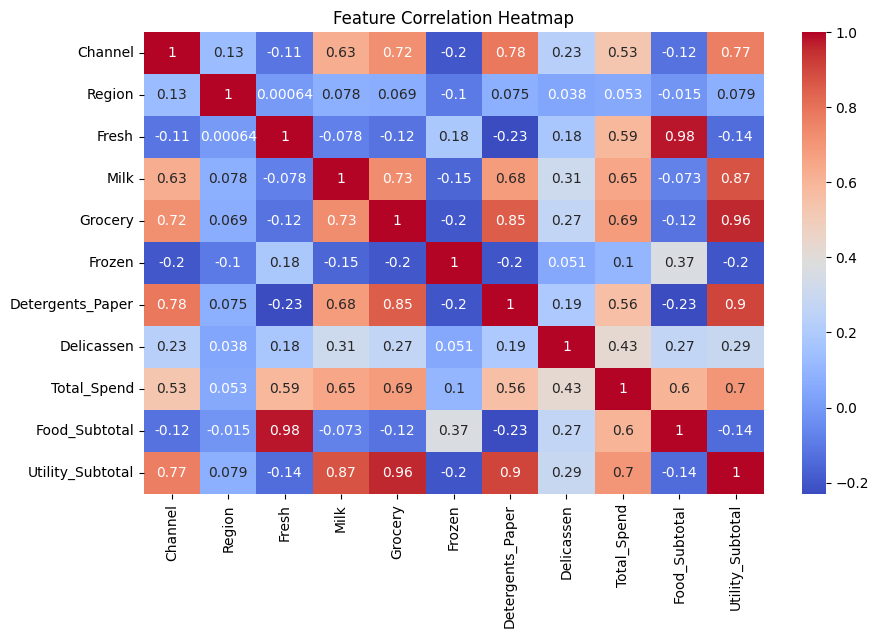

In [ ]:
# 4. Create 3 new meaningful features
df['Total_Spend'] = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum(axis=1)
df['Food_Subtotal'] = df['Fresh'] + df['Frozen'] + df['Delicassen']
df['Utility_Subtotal'] = df['Milk'] + df['Grocery'] + df['Detergents_Paper']

# 5. Outlier Detection (using IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

#scalling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(['Channel','Region'], axis=1))

# 6. Multicollinearity (Correlation Heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

**Part c: Regression Analysis**

In [ ]:
# 7. Target: Total_Spend
X_reg = df_cleaned.drop(['Total_Spend', 'Channel', 'Region'], axis=1)
y_reg = df_cleaned['Total_Spend']

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 8 & 10. Build & Compare Models
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0)
}

linear_model = None
ridge_model = None
lasso_model = None

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"--- {name} Regression ---")
    print(f"MAE: {mean_absolute_error(y_test, preds):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.2f}")
    print(f"R2: {r2_score(y_test, preds):.2f}\n")

    if name == "Linear":
        linear_model = model
    elif name == "Ridge":
        ridge_model = model
    elif name == "Lasso":
        lasso_model = model


# Compare how many features Lasso "dropped" (set to zero)
if lasso_model:
    print(f"Lasso coefficients: {lasso_model.coef_}")
if ridge_model:
    print(f"Ridge coefficients: {ridge_model.coef_}")

--- Linear Regression ---
MAE: 0.00
RMSE: 0.00
R2: 1.00

--- Ridge Regression ---
MAE: 0.00
RMSE: 0.00
R2: 1.00

--- Lasso Regression ---
MAE: 0.27
RMSE: 0.42
R2: 1.00

Lasso coefficients: [ 0.80356445  1.36699221  1.36726052  0.80356777  1.3668364   0.80349656
  0.19643071 -0.36708723]
Ridge coefficients: [0.25000035 0.25000315 0.25000315 0.25000035 0.25000315 0.25000034
 0.74999965 0.74999685]


**Part D: Classification modeling**

In [ ]:
#Prepare data
X = df.drop(['Channel','Region'], axis=1)
y = df['Channel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Models
models = {
    "Logistic": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [ ]:
#Compare models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:,1]

    results.append([
        name,
        accuracy_score(y_test, preds),
        precision_score(y_test, preds),
        recall_score(y_test, preds),
        f1_score(y_test, preds),
        roc_auc_score(y_test, probs)
    ])

results_df = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1","ROC_AUC"])
results_df

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic,0.931818,0.953846,0.953846,0.953846,0.955184
1,SVM,0.909091,0.952381,0.923077,0.937500,0.967224
2,Decision Tree,0.886364,0.950820,0.892308,0.920635,0.880936
3,Random Forest,0.909091,0.967213,0.907692,0.936508,0.957860
4,Gradient Boosting,0.909091,0.967213,0.907692,0.936508,0.951839


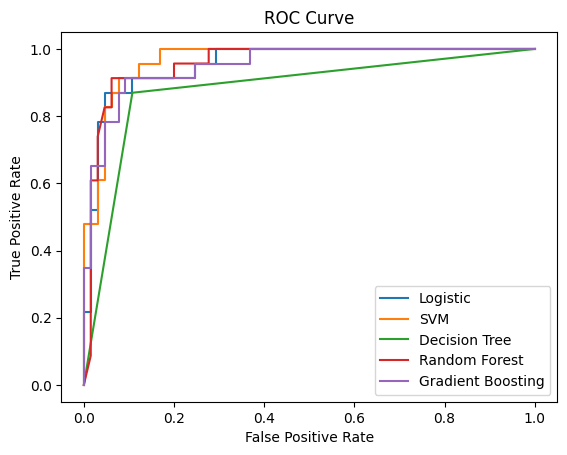

In [ ]:
#ROC Cureve
for name, model in models.items():
    probs = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, probs, pos_label=2)
    plt.plot(fpr, tpr, label=name)

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

**Part E: Unsupervised learning**

In [ ]:
#K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

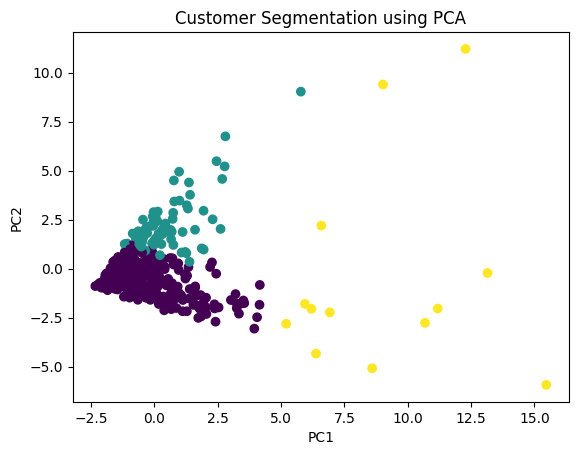

In [ ]:
#PCA Visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.scatter(pca_data[:,0], pca_data[:,1], c=df['Cluster'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer Segmentation using PCA")
plt.show()

**Part F: Model evalution and insights**


In [ ]:
#Overfitting Vs Underfitting
#Feature Scaling
#Class Imbalance

print("""
Overfitting: Model performs well on training but poorly on test data
Underfitting: Model performs poorly on both

Feature Scaling:
- Essential for SVM, Logistic, K-Means

Class Imbalance:
- Affects Precision & Recall
- Handled using ROC-AUC, F1-score
""")


Overfitting: Model performs well on training but poorly on test data
Underfitting: Model performs poorly on both

Feature Scaling:
- Essential for SVM, Logistic, K-Means

Class Imbalance:
- Affects Precision & Recall
- Handled using ROC-AUC, F1-score

